In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import stan_jupyter as stan
import pandas as pd

import sys         

sys.path.append('../../disty')        
from disty import Posterior, DataTools

In [2]:
df = pd.read_csv("sim_data.csv")

## Speed test: standardized, logged, normal

## Poisson vs. negative binomial vs. normal

## Using matrices for covariates 

## Standardizing by group

In [3]:
dt = DataTools()
dt.standardize(df, ["quantity", "price", "competitor_price"], ["sku", "account"])
dt.center(df, ["quantity", "price", "competitor_price"], ["sku", "account"])
dt.log(df, ["quantity", "price", "competitor_price"])

In [4]:
df

sku  account       price  competitor_price  quantity  std_quantity  \
0       1        1   56.823414         42.491756        37     -0.091703   
1       1        1   65.407358         37.075356        35     -0.437751   
2       1        1   58.050157         36.086574        42      0.773417   
3       1        1   64.869742         36.131272        39      0.254345   
4       1        1   57.048158         42.046096        35     -0.437751   
...   ...      ...         ...               ...       ...           ...   
2495    5        5  145.665569        165.042661        34     -0.286693   
2496    5        5  155.103174        194.590884        36     -0.059159   
2497    5        5  151.931073        176.497027        29     -0.855528   
2498    5        5  146.788845        227.713877        53      1.874881   
2499    5        5  138.263665        158.740651        27     -1.083062   

      std_price  std_competitor_price  ctr_quantity  ctr_price  \
0     -1.037799              0.909556         -0.53  -7.003338   
1      0.234224             -0.421294         -2.53   1.580606   
2     -0.856012             -0.664245          4.47  -5.776595   
3      0.154557             -0.653263          1.47   1.042990   
4     -1.004495              0.800054         -2.53  -6.778594   
...         ...                   ...           ...        ...   
2495  -0.077608             -0.810509         -2.52  -1.389133   
2496   0.449650              0.809012         -0.52   8.048472   
2497   0.272432             -0.182702         -7.52   4.876372   
2498  -0.014853              2.624464         16.48  -0.265857   
2499  -0.491136             -1.155918         -9.52  -8.791037   

      ctr_competitor_price  log_quantity  log_price  log_competitor_price  
0                 3.701783      3.610945   4.039966              3.749334  
1                -1.714617      3.555377   4.180650              3.612979  
2                -2.703398      3.737693   4.061325              3.585949  
3                -2.658700      3.663587   4.172397              3.587186  
4                 3.256123      3.555377   4.043913              3.738790  
...                    ...           ...        ...                   ...  
2495            -14.787764      3.526390   4.981320              5.106210  
2496             14.760459      3.583547   5.044097              5.270904  
2497             -3.333399      3.367330   5.023434              5.173310  
2498             47.883452      3.970311   4.989002              5.428094  
2499            -21.089774      3.295874   4.929170              5.067278  

[2500 rows x 14 columns]

In [8]:
group_counts = [3, 10]
group_cols = ["one", "two"]

for i in range(len(group_cols)):
    print(group_cols[i], group_counts[i])

one 3
two 10


In [172]:
with open("stan_code/base_case_prior_predictive_check.stan", "r") as f:
    model_code = f.read()
    
model_data = {
    "N":len(df),
    "N_SKUS":df.sku.nunique(),
    "N_ACCOUNTS":df.account.nunique(),
    "sku":df.sku.tolist(),
    "account":df.account.tolist(),
    "quantity":df.quantity.tolist(),
    "price":df.price.tolist(),
    "competitor_price":df.competitor_price.tolist(),
}

In [352]:
%%capture
posterior = stan.build(model_code, model_data)

In [353]:
%%time
%%capture
fit = posterior.sample(num_chains=4, num_samples=1000) # Normal model

CPU times: user 23.6 s, sys: 1.78 s, total: 25.4 s
Wall time: 44.5 s


<AxesSubplot:>

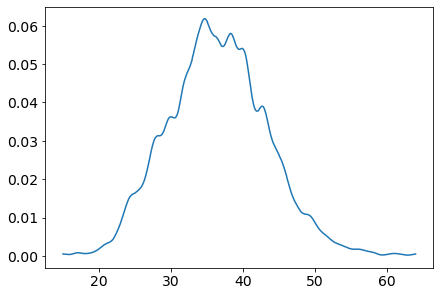

In [354]:
az.plot_kde(df.quantity)

In [355]:
[k for k in fit]

['alpha', 'beta', 'gamma', 'sigma', 'mu', 'y_pred']

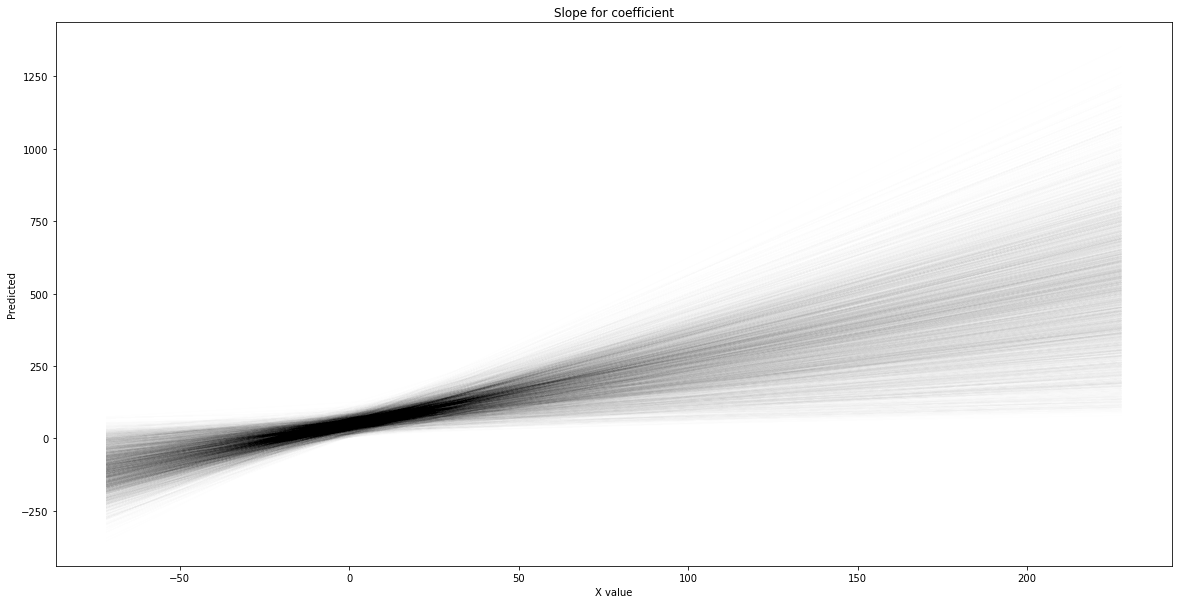

In [382]:
test.plot_coef(df.competitor_price.tolist(), test.alpha, test.gamma)

In [63]:
df.quantity.describe()

count    2500.000000
mean       36.474400
std         6.819204
min        15.000000
25%        32.000000
50%        36.000000
75%        41.000000
max        64.000000
Name: quantity, dtype: float64

In [ ]:
plt.figure(figsize=(20,10))
for i in range(1, 10000):
    plt.plot(
        df.price-df.price.mean(),
        sample_alpha[i]+sample_beta[i]*(df.age-df.age.mean()),
        color='black',
        alpha=.01)

In [26]:
scale

0      -43.821961
1      -35.238017
2      -42.595218
3      -35.775633
4      -43.597217
          ...    
2495    45.020194
2496    54.457799
2497    51.285698
2498    46.143470
2499    37.618290
Name: price, Length: 2500, dtype: float64

<AxesSubplot:>

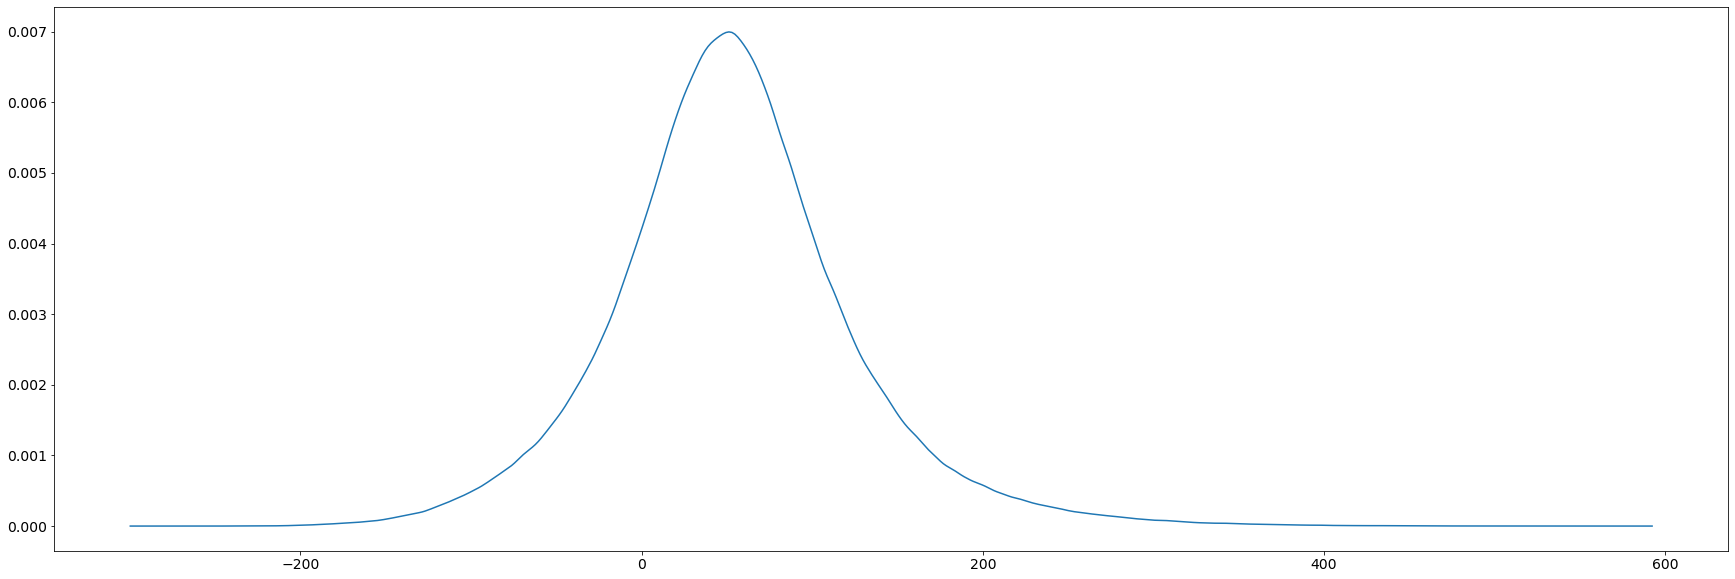

In [231]:
plt.figure(figsize=(30, 10))
az.plot_kde(fit['y_pred'])

In [232]:
az.summary(fit)

mean       sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
alpha          52.907   19.213   17.232   91.275      2.140    1.519   
beta           -2.142    0.946   -3.650   -0.484      0.121    0.086   
gamma           2.184    0.931    0.387    3.842      0.095    0.067   
sigma           4.309    2.501    0.232    8.721      0.283    0.201   
mu[0]          21.305   69.115 -102.815  136.718      6.788    4.813   
...               ...      ...      ...      ...        ...      ...   
y_pred[2495]   98.598   76.830  -65.165  213.313      8.513    6.041   
y_pred[2496]  143.114  103.609  -63.932  314.927     11.174    7.928   
y_pred[2497]  110.226   88.313  -63.762  259.266      9.692    6.878   
y_pred[2498]  233.187  128.115   -2.622  464.295     13.212    9.372   
y_pred[2499]  100.537   68.466  -35.745  213.377      7.774    5.518   

              ess_bulk  ess_tail  r_hat  
alpha             82.0      47.0   1.06  
beta              48.0      32.0   1.08  
gamma             94.0      97.0   1.05  
sigma             66.0     155.0   1.06  
mu[0]            105.0     194.0   1.02  
...                ...       ...    ...  
y_pred[2495]      82.0     122.0   1.03  
y_pred[2496]      87.0     152.0   1.03  
y_pred[2497]      83.0      96.0   1.03  
y_pred[2498]      94.0     123.0   1.04  
y_pred[2499]      77.0     109.0   1.03  

[5004 rows x 9 columns]

In [ ]:
az.plot_kde(stats.norm.rvs(loc=50, scale=30, size=1000))

In [72]:
%%time
#%%capture
fit = posterior.sample(num_chains=4, num_samples=1000) # Standardized

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   5% (401/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  19% (1500/8000)
Sampling:  21% (1700/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  51% (4100/8000)
Sampling:  68% (5400/8000)
Sampling:  70% (5601/8000)
Sampling:  88% (7001/8000)
Sampling:  89% (7100/8000)
Sampling:  90% (7200/8000)
Sampling:  91% (7300/8000)
Sampling:  92% (7400/8000)
Sampling:  94% (7500/8000)
Sampling:  95% (7600/8000)
Sampling:  96% (7700/8000)
Sampling:  98% (7800/8000)
Sampling:  99% (7900/8000)
S

CPU times: user 25.7 s, sys: 1.71 s, total: 27.5 s
Wall time: 49.8 s


<AxesSubplot:>

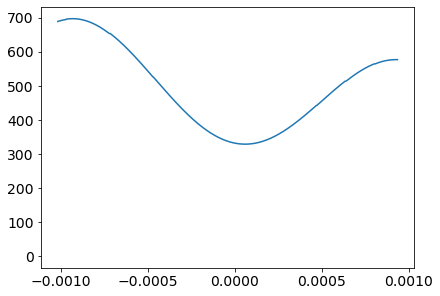

In [162]:
az.plot_kde([n.mean() for n in fit['account_slope']])

<AxesSubplot:>

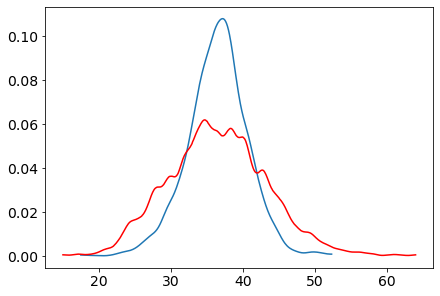

In [161]:
az.plot_kde([n.mean() for n in fit['y_pred']])
az.plot_kde([n.mean() for n in fit['y']], plot_kwargs={"color":'r'})